LOGISTIC REGRESSION - HEART DISEASE PREDICTION

Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
• Sex: male or female(Nominal)
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
Logistic Regression
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.
The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elimination approach is used here to remove those attributes with highest P-value one at a time followed by running the regression repeatedly until all attributes have P Values less than 0.05.

In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
# 1. Missing Value Treatment
df.isnull().sum()/len(df)

male               0.000000
age                0.000000
education          0.024776
currentSmoker      0.000000
cigsPerDay         0.006843
BPMeds             0.012506
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011798
sysBP              0.000000
diaBP              0.000000
BMI                0.004483
heartRate          0.000236
glucose            0.091553
TenYearCHD         0.000000
dtype: float64

In [6]:
df.education.value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [7]:
df['education'].fillna(1, inplace=True)

In [8]:
df.BPMeds.value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

In [9]:
df['BPMeds'].fillna(0, inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<AxesSubplot:xlabel='cigsPerDay'>

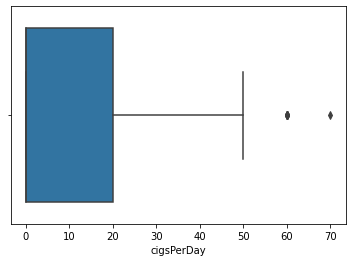

In [12]:
# outlier treatment

sns.boxplot(df['cigsPerDay'])

In [13]:
df=df[df['cigsPerDay']< 55]

<AxesSubplot:xlabel='cigsPerDay'>

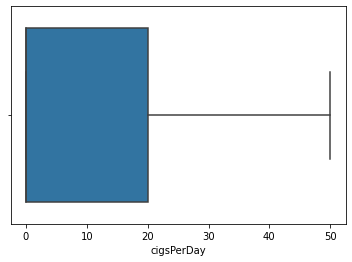

In [14]:
sns.boxplot(df.cigsPerDay)

<AxesSubplot:xlabel='totChol'>

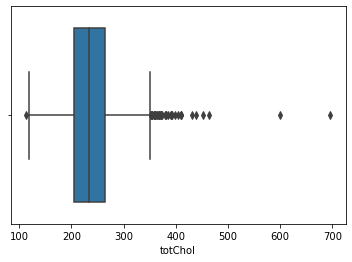

In [15]:
sns.boxplot(df.totChol)

In [16]:
#2 Calculate Q1(25%) and Q3(75%)

q1,q3 = np.percentile(df['totChol'],[25,75])
print(q1,q3)

# #for bettet understanding
print('Q1(25%) is:',q1)
print('Q3(75%) is:',q3)

#3 IQR=(Q3-Q1)
iqr = q3-q1
print(iqr)

#4 Find the Lower Fence - (Q1-1.5(IQR))
lower_fence = (q1-1.5*(iqr))
print(lower_fence)


#5 Find the Upper Fence - (Q3+1.5(IQR))
upper_fence = (q3+1.5*(iqr))
print(upper_fence)

count_invalid = 0
count_valid = 0
for i in df['totChol']:
    if i > lower_fence and i < upper_fence:
        count_valid = count_valid + 1
    else:
        count_invalid = count_invalid+ 1
print("Inbound Data:",count_valid)
print("Outliers:",count_invalid)
print("Total Count", df['totChol'].size)

206.0 264.0
Q1(25%) is: 206.0
Q3(75%) is: 264.0
58.0
119.0
351.0
Inbound Data: 3743
Outliers: 46
Total Count 3789


In [17]:
df=df[df['totChol']< 400]

<AxesSubplot:xlabel='totChol'>

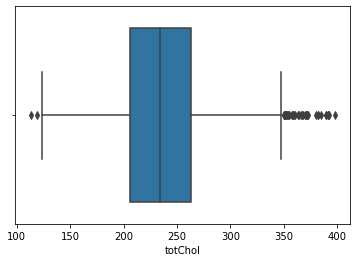

In [18]:
sns.boxplot(df.totChol)

<AxesSubplot:xlabel='diaBP'>

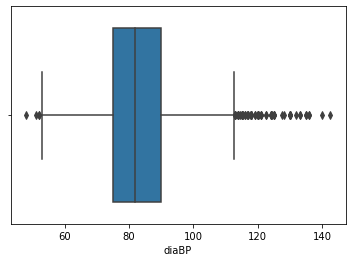

In [19]:
sns.boxplot(df.diaBP)

<AxesSubplot:xlabel='heartRate'>

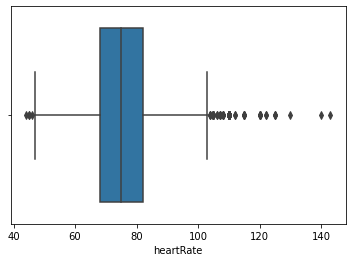

In [20]:
sns.boxplot(df.heartRate)

<AxesSubplot:xlabel='glucose'>

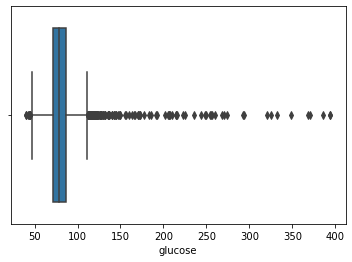

In [21]:
sns.boxplot(df.glucose)

# Univeriate Analysis

In [22]:
df.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000,3779.000000
mean,0.441387,49.629267,1.956073,0.485578,8.841492,0.029902,0.005822,0.311987,0.027256,236.306695,132.413601,82.929214,25.804210,75.676899,81.867425,0.152686
std,0.496618,8.590218,1.022602,0.499858,11.618677,0.170340,0.076087,0.463366,0.162850,42.865066,22.108900,11.965981,4.073353,11.920201,23.841326,0.359732
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.390000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.050000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,398.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Biveriate Analysis

In [23]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.027711,0.018383,0.201585,0.321130,-0.049677,-0.004977,-0.000454,0.014850,-0.078627,-0.048332,0.051382,0.075829,-0.117776,0.002462,0.093816
age,-0.027711,1.000000,-0.157456,-0.215179,-0.197223,0.128956,0.054329,0.308092,0.108642,0.275938,0.390462,0.204120,0.136181,-0.005748,0.119572,0.233575
education,0.018383,-0.157456,1.000000,0.027759,0.018885,-0.012212,-0.030731,-0.076088,-0.042081,-0.010012,-0.120129,-0.055674,-0.140772,-0.059576,-0.033645,-0.061631
currentSmoker,0.201585,-0.215179,0.027759,1.000000,0.783351,-0.049336,-0.039549,-0.109133,-0.045570,-0.058120,-0.137670,-0.118359,-0.165398,0.052859,-0.056742,0.021817
cigsPerDay,0.321130,-0.197223,0.018885,0.783351,1.000000,-0.044146,-0.037281,-0.076064,-0.038984,-0.039527,-0.097595,-0.064131,-0.098776,0.069355,-0.058224,0.059875
BPMeds,-0.049677,0.128956,-0.012212,-0.049336,-0.044146,1.000000,0.109100,0.260719,0.056489,0.088791,0.267026,0.198685,0.105026,0.007758,0.053118,0.080977
prevalentStroke,-0.004977,0.054329,-0.030731,-0.039549,-0.037281,0.109100,1.000000,0.068592,0.008553,0.017875,0.060327,0.048131,0.030880,-0.021273,0.024647,0.054550
prevalentHyp,-0.000454,0.308092,-0.076088,-0.109133,-0.076064,0.260719,0.068592,1.000000,0.080205,0.160934,0.698210,0.614770,0.301245,0.139209,0.084897,0.177823
diabetes,0.014850,0.108642,-0.042081,-0.045570,-0.038984,0.056489,0.008553,0.080205,1.000000,0.034559,0.105452,0.049550,0.096411,0.062215,0.614636,0.091600
totChol,-0.078627,0.275938,-0.010012,-0.058120,-0.039527,0.088791,0.017875,0.160934,0.034559,1.000000,0.216416,0.169849,0.120143,0.084417,0.040465,0.086978


<AxesSubplot:>

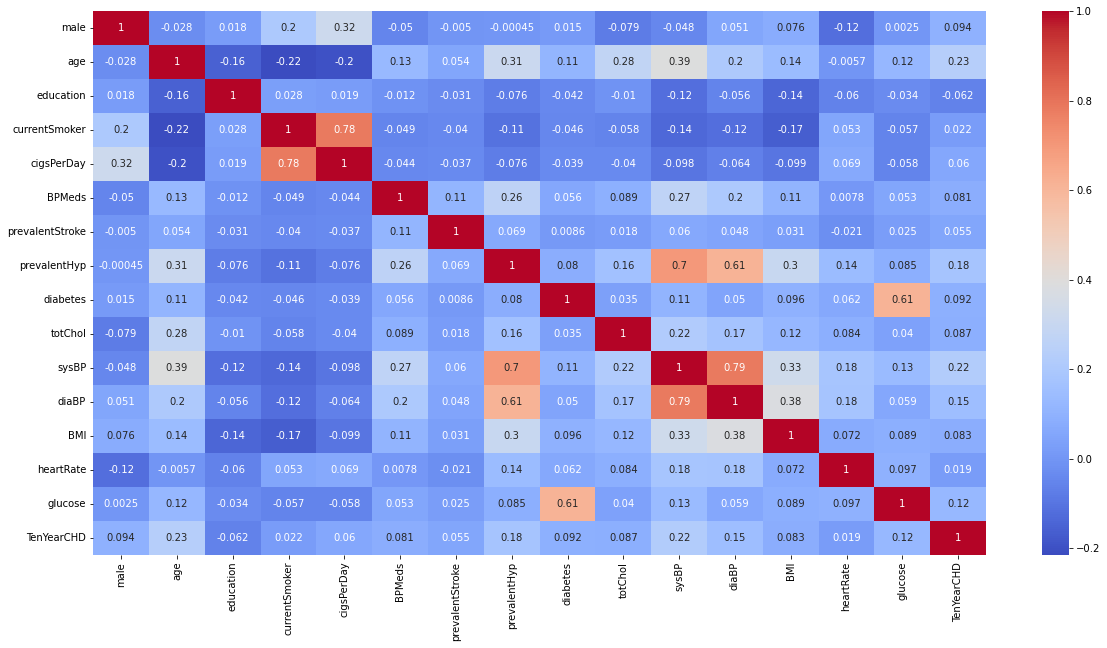

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)


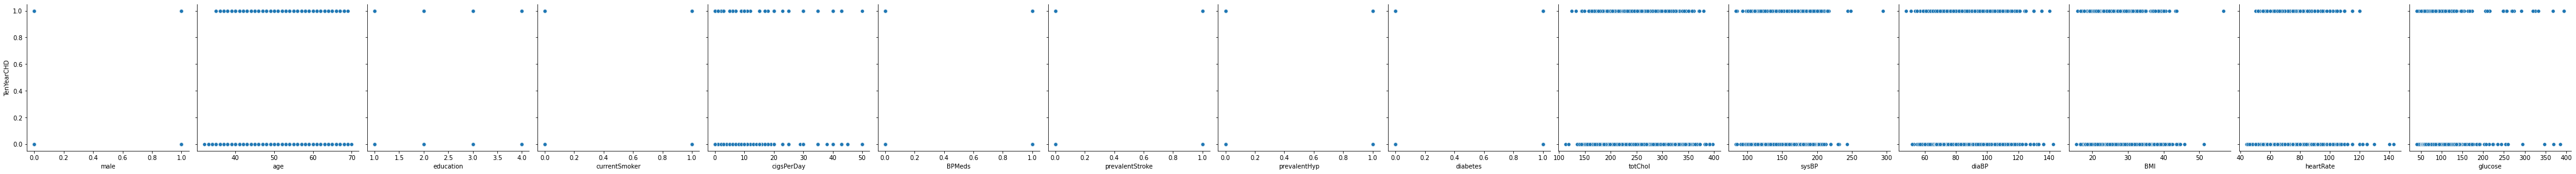

In [25]:
sns.pairplot(df, x_vars=['male','age','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol',
                       'sysBP','diaBP','BMI','heartRate','glucose'], y_vars='TenYearCHD', height=4, aspect=1, kind='scatter')

# Multicolinearity

In [26]:
#2. Multicolinearity
# If vif is greater that 4 then there is multicolinarity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

x1= df[['male','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes',
                       'glucose']]

vif_data = pd.DataFrame()
vif_data['features']= x1.columns

vif_data['VIF'] = [variance_inflation_factor(x1.values, i)
                  for i in range(len(x1.columns))]
print(vif_data)

          features       VIF
0             male  1.982536
1        education  3.966507
2    currentSmoker  5.003478
3       cigsPerDay  4.407714
4           BPMeds  1.120853
5  prevalentStroke  1.021940
6     prevalentHyp  1.564603
7         diabetes  1.264457
8          glucose  5.716737


In [27]:
final_train= df[['male','education','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes',
                       'glucose','TenYearCHD']]

In [28]:
from statsmodels.tools import add_constant as add_constant
final_train_constant = add_constant(final_train)
final_train_constant.head()

,const,male,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,glucose,TenYearCHD
0,1.0,1,4.0,0,0.0,0.0,0,0,0,77.0,0
1,1.0,0,2.0,0,0.0,0.0,0,0,0,76.0,0
2,1.0,1,1.0,1,20.0,0.0,0,0,0,70.0,0
3,1.0,0,3.0,1,30.0,0.0,0,1,0,103.0,1
4,1.0,0,3.0,1,23.0,0.0,0,0,0,85.0,0


In [29]:
# Fitting the model 
X = final_train_constant.drop('TenYearCHD',axis=1)
y = final_train_constant['TenYearCHD']


In [30]:
# Train And Test
    
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [31]:
# Model Building 
import statsmodels.api as sm
# Fit the resgression line using 'OLS'
lr = sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.397944
         Iterations 6


In [32]:
print(lr.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3023
Model:                          Logit   Df Residuals:                     3013
Method:                           MLE   Df Model:                            9
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                 0.06684
Time:                        20:34:11   Log-Likelihood:                -1203.0
converged:                       True   LL-Null:                       -1289.2
Covariance Type:            nonrobust   LLR p-value:                 2.006e-32
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.9862      0.250    -11.940      0.000      -3.476      -2.496
male                0.5203      0.112      4.659      0.000       0.301       0.739
education          -0.1711      

# Model Creation over Test Data

In [33]:
Y_pred = lr.predict(x_test)

In [34]:
Y_pred

1149    0.150251
2000    0.089604
1880    0.233670
3362    0.136490
32      0.202090
          ...   
2243    0.111950
3971    0.858705
2377    0.082908
4143    0.124986
1708    0.086464
Length: 756, dtype: float64

In [35]:
y_pred_new = np.where(Y_pred > 0.5,1,0)
y_pred_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       639
           1       0.38      0.03      0.05       117

    accuracy                           0.84       756
   macro avg       0.61      0.51      0.48       756
weighted avg       0.77      0.84      0.78       756



In [37]:
y_pred_new1 = np.where(Y_pred > 0.15,1,0)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_new1))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75       639
           1       0.25      0.65      0.36       117

    accuracy                           0.64       756
   macro avg       0.58      0.65      0.56       756
weighted avg       0.81      0.64      0.69       756



# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='entropy',max_depth = 3 , min_samples_leaf = 50 )



# fit the model
clf_gini = clf_gini.fit(X, y)

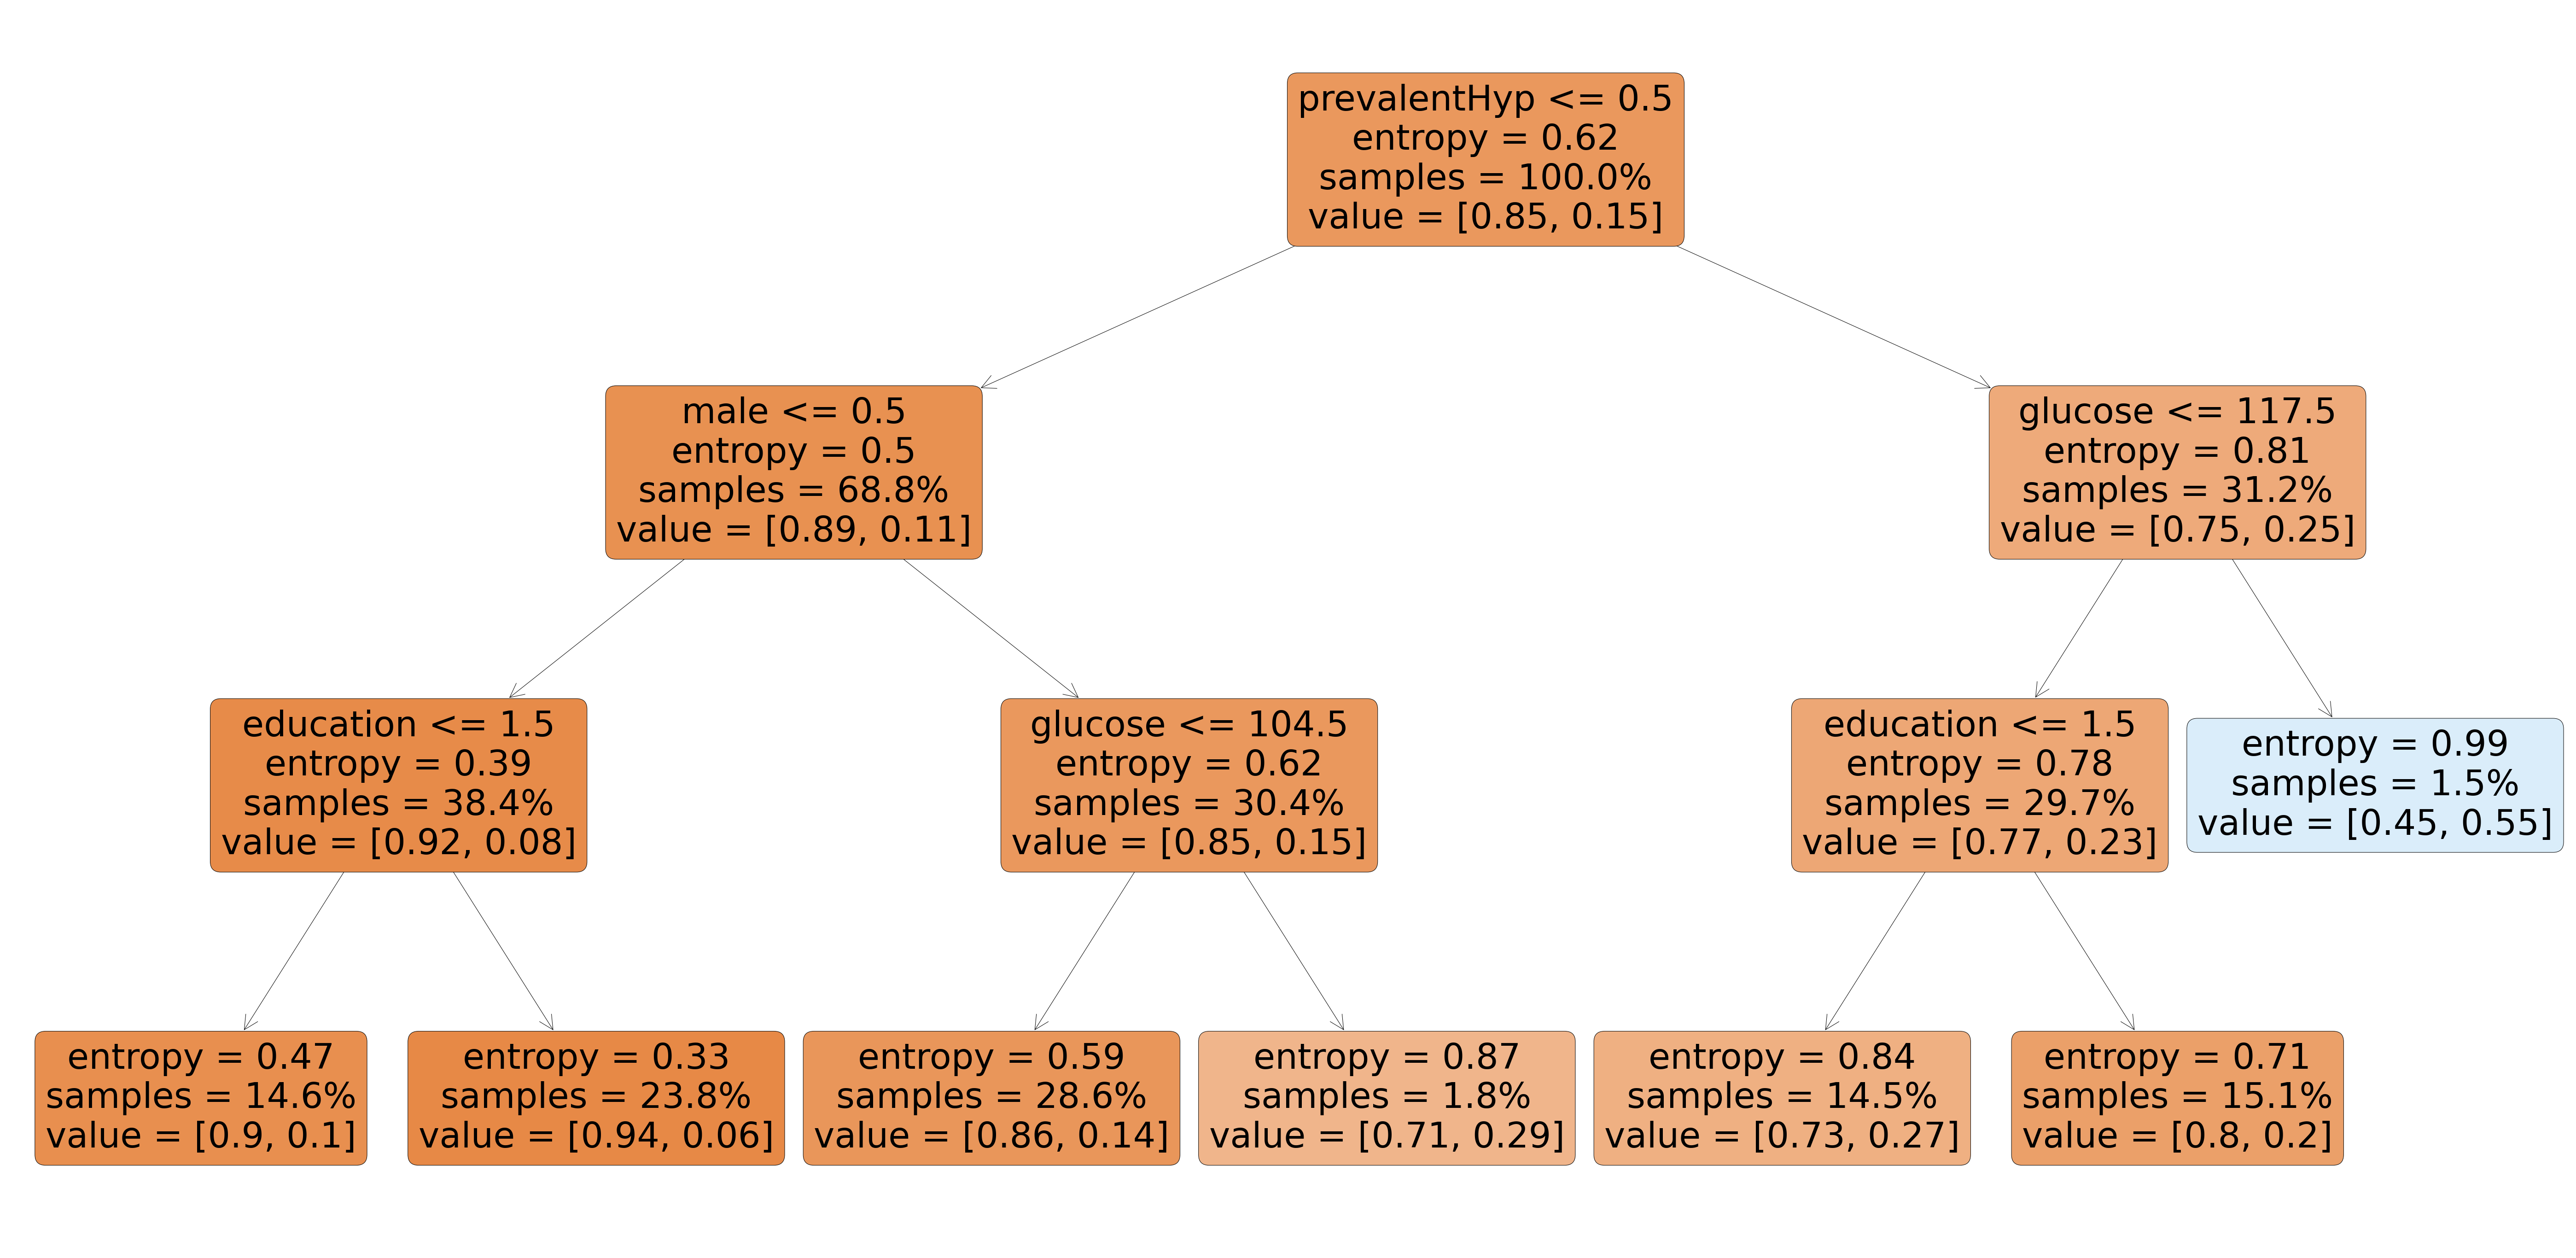

In [40]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

plt.figure(figsize=(100,50))

from sklearn.tree import plot_tree 

a = plot_tree(decision_tree= clf_gini,feature_names = X.columns , filled = True , precision = 2 , rounded = True,
              proportion=True)


In [41]:
y_pred_gini = clf_gini.predict(X)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8489


# Random forest regression


In [42]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators=100, criterion="gini",max_depth=100)  
classifier.fit(X, y)  

RandomForestClassifier(max_depth=100)

In [43]:
#Predicting the test set result  
y_pred_new= classifier.predict(X)  
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_pred_new))

0.928287906853665


In [44]:
#Creating the Confusion matrix  
from sklearn.metrics import classification_report 
 
print(classification_report(y,y_pred_new))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3202
           1       0.92      0.58      0.71       577

    accuracy                           0.93      3779
   macro avg       0.92      0.79      0.84      3779
weighted avg       0.93      0.93      0.92      3779

